In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [54]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')
june_over_perc = ts((june_over$series/june_over$total), frequency=24)
june_under_perc = ts((june_under$series/june_under$total), frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [89]:
jo = ts(june_over$series[33:(24*30-16)], frequency=24)
ju = ts(june_under$series[33:(24*30-16)], frequency=24)

In [58]:
jo = ts(june_over_perc[33:(24*30-16)], frequency=24)
ju = ts(june_under_perc[33:(24*30-16)], frequency=24)

In [101]:
june = june_ts()*(june_under$total[33:(24*30-16)])

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


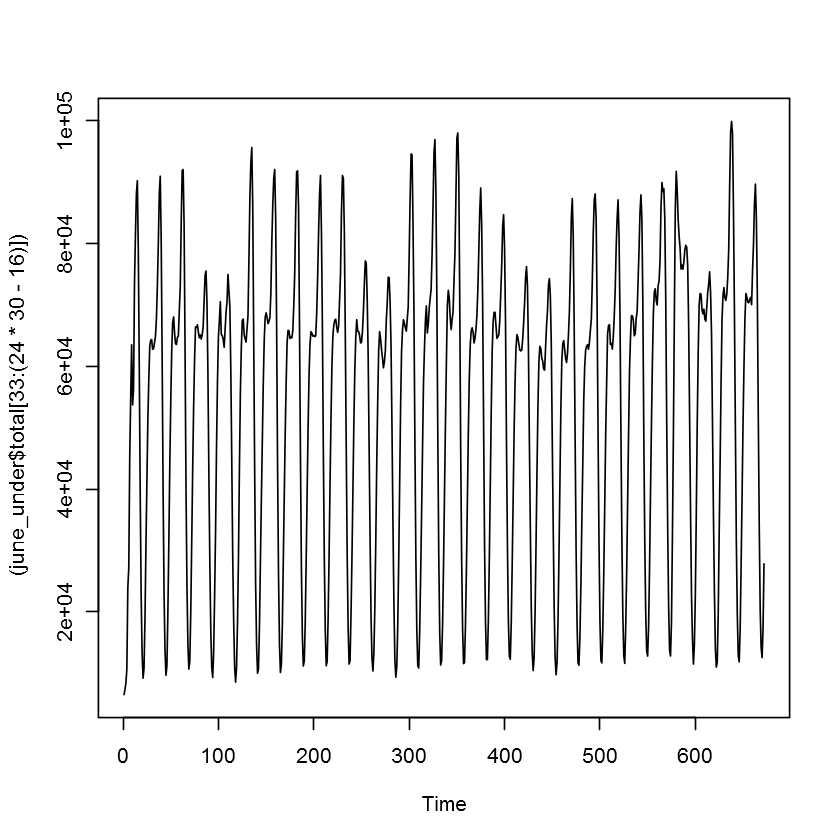

In [107]:
plot.ts((june_under$total[33:(24*30-16)]))

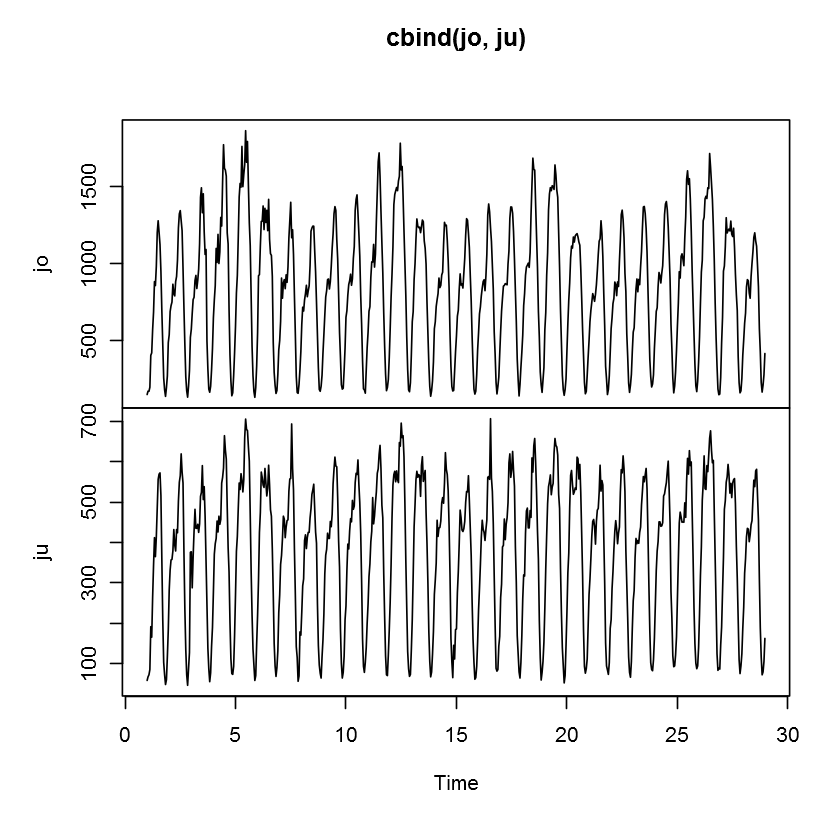

In [103]:
plot.ts(cbind(jo, ju))

Breakdown by day of week:

In [90]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

In [91]:
weekdays = c('Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday')

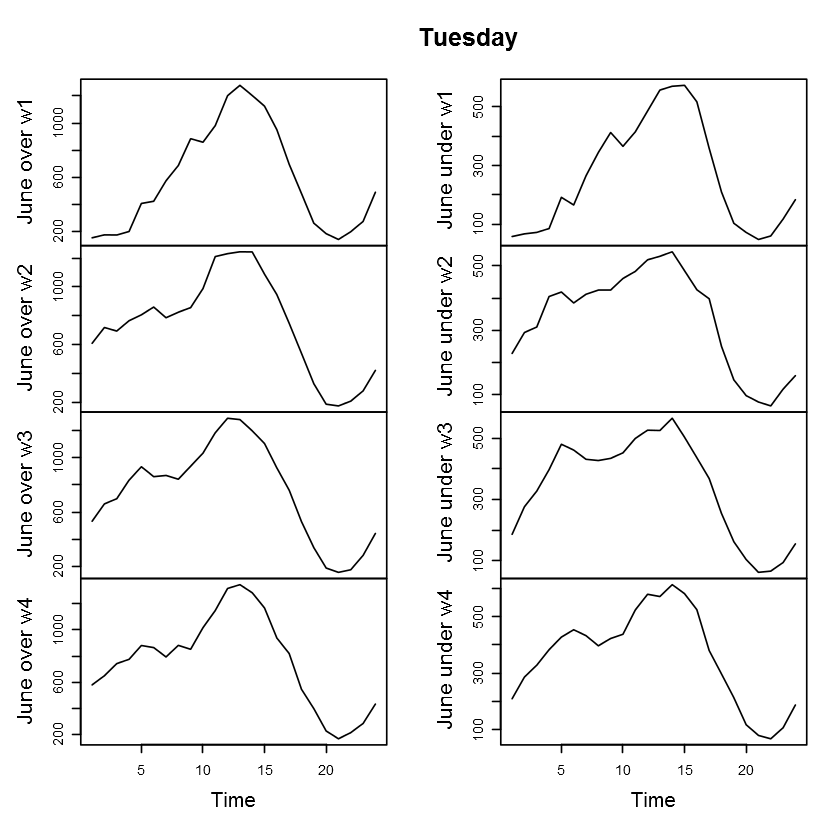

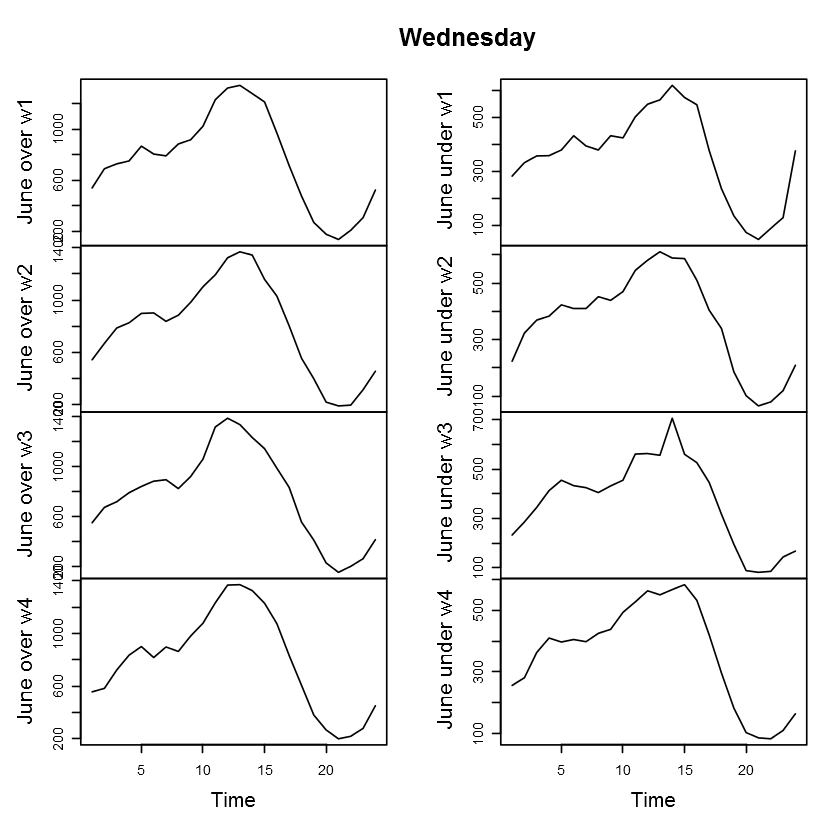

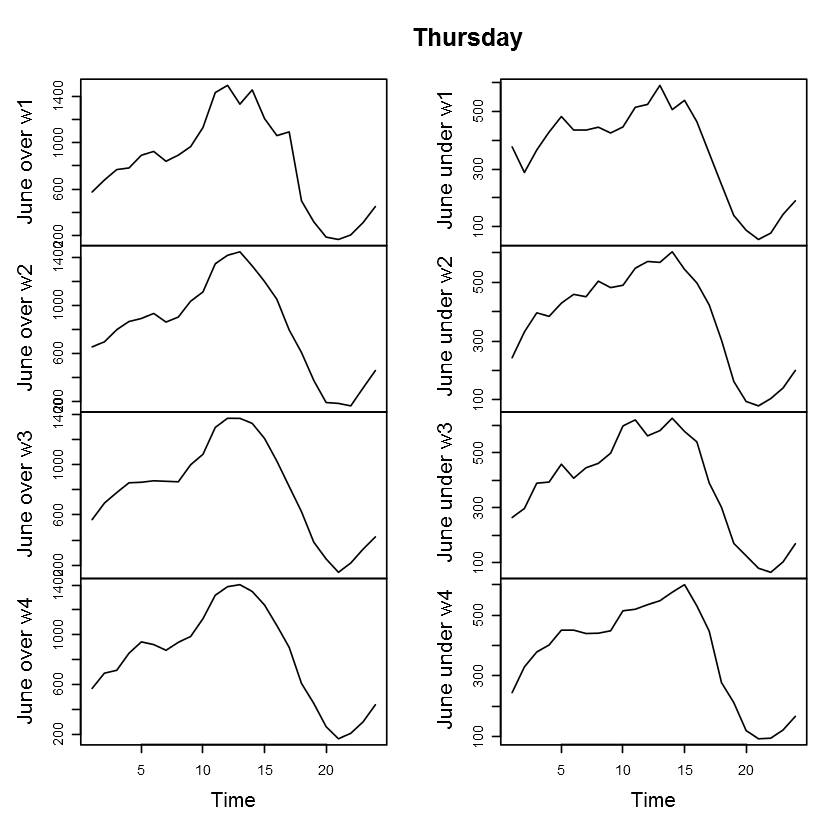

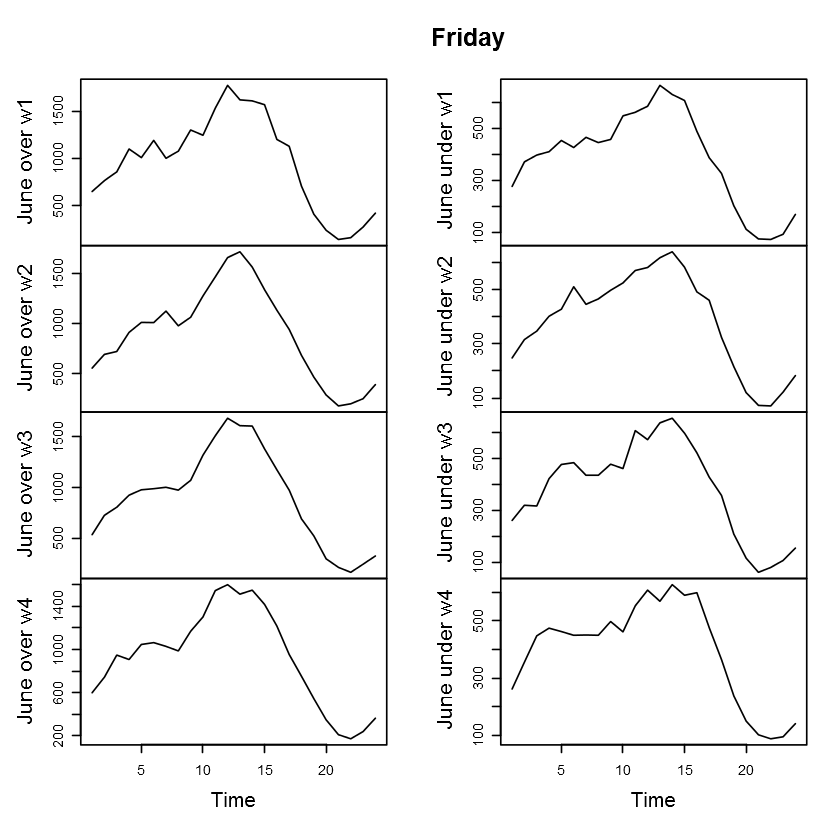

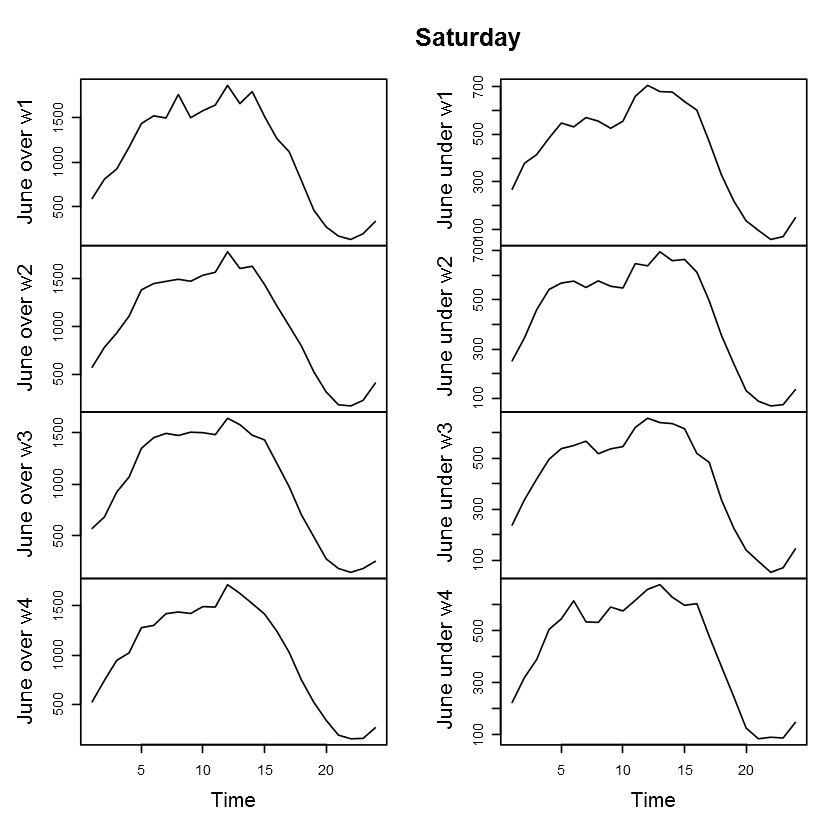

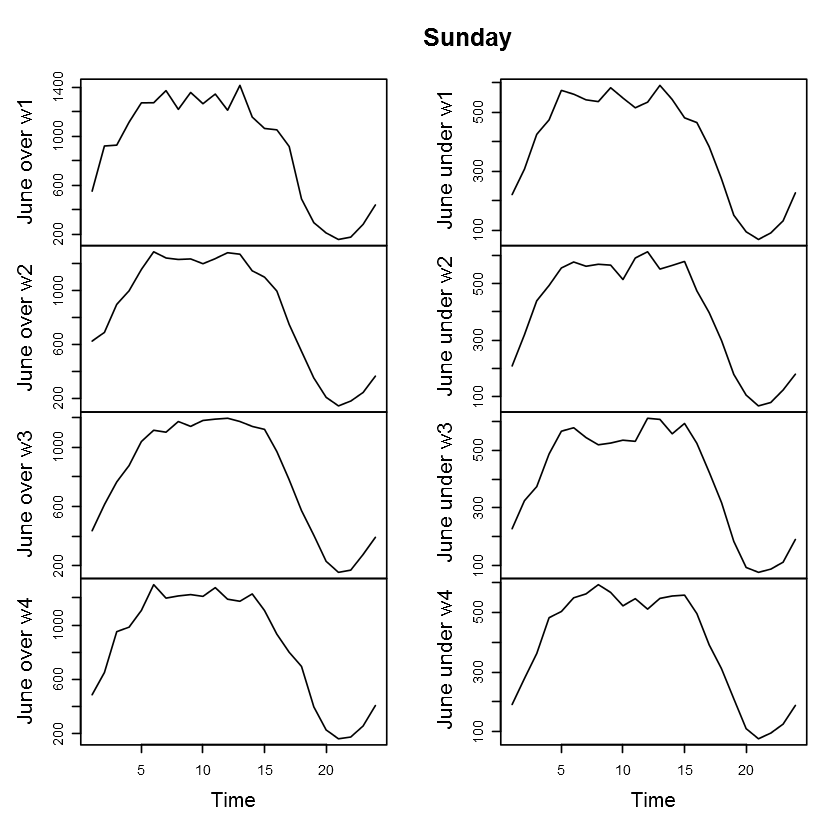

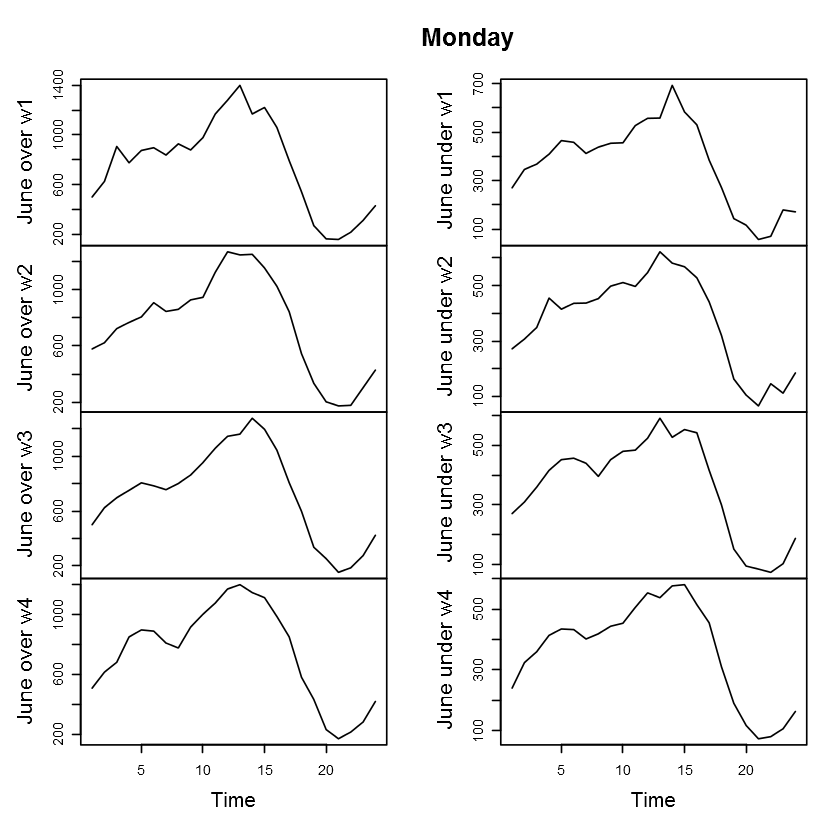

In [92]:
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}

In [93]:
jo_weekday = day_of_week(as.vector(jo))
ju_weekday = day_of_week(as.vector(ju))

In [105]:
june_weekday = day_of_week(as.vector(june))
june_avg_day = apply(june_weekday, 1, rowMeans)
colnames(june_avg_day) = weekdays

In [95]:
jo_avg_day = apply(jo_weekday, 1, rowMeans)
colnames(jo_avg_day) = weekdays

In [96]:
ju_avg_day = apply(ju_weekday, 1, rowMeans)
colnames(ju_avg_day) = weekdays

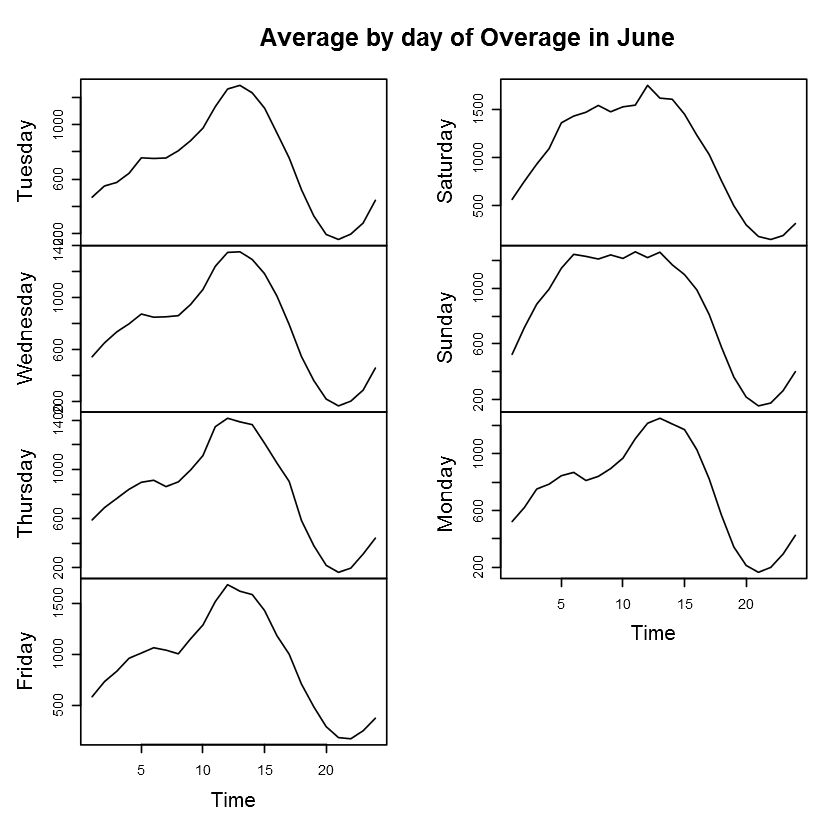

In [97]:
plot.ts(jo_avg_day, main='Average by day of Overage in June')

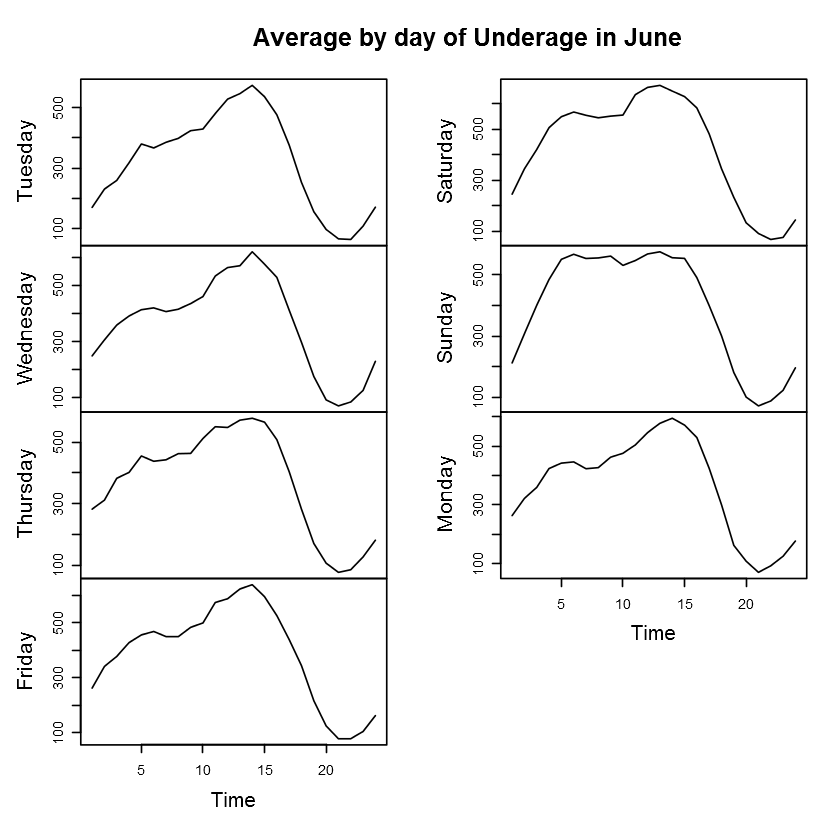

In [98]:
plot.ts(ju_avg_day, main='Average by day of Underage in June')

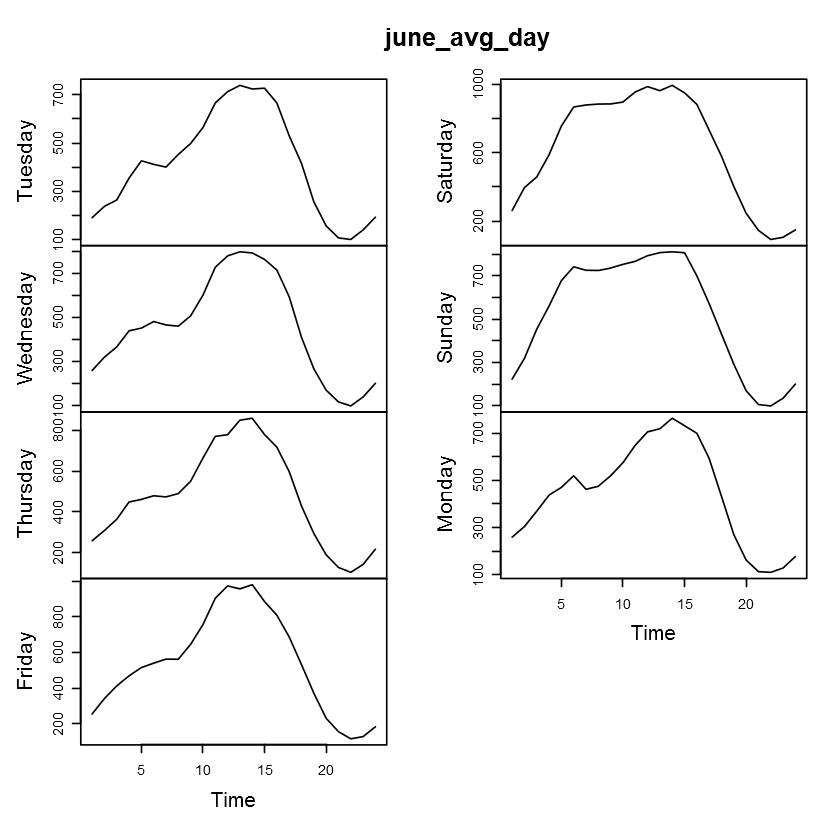

In [106]:
plot.ts(june_avg_day)

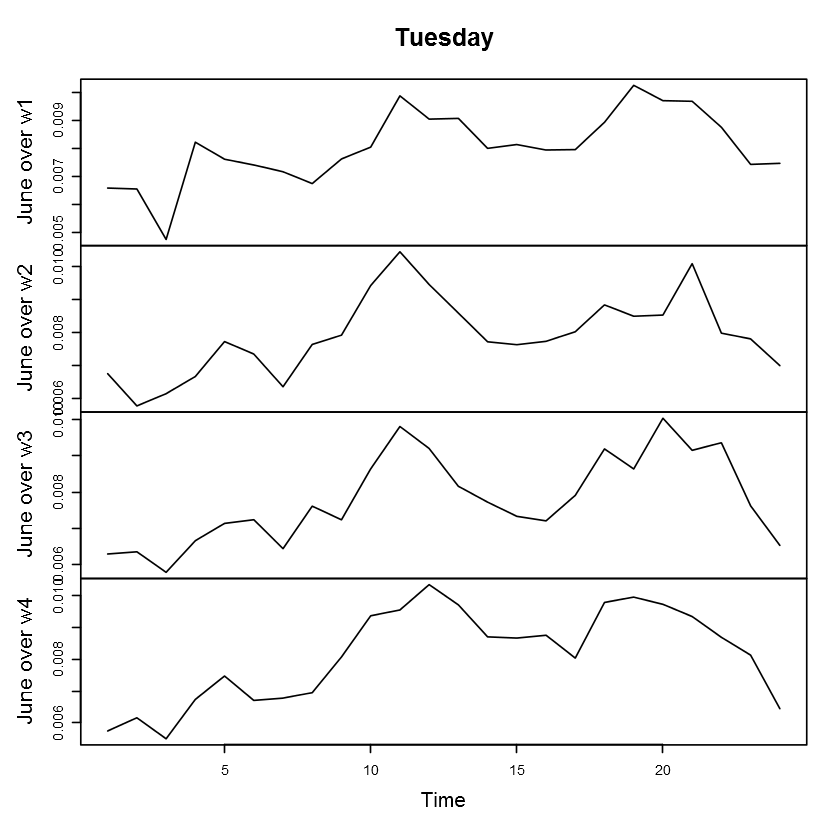

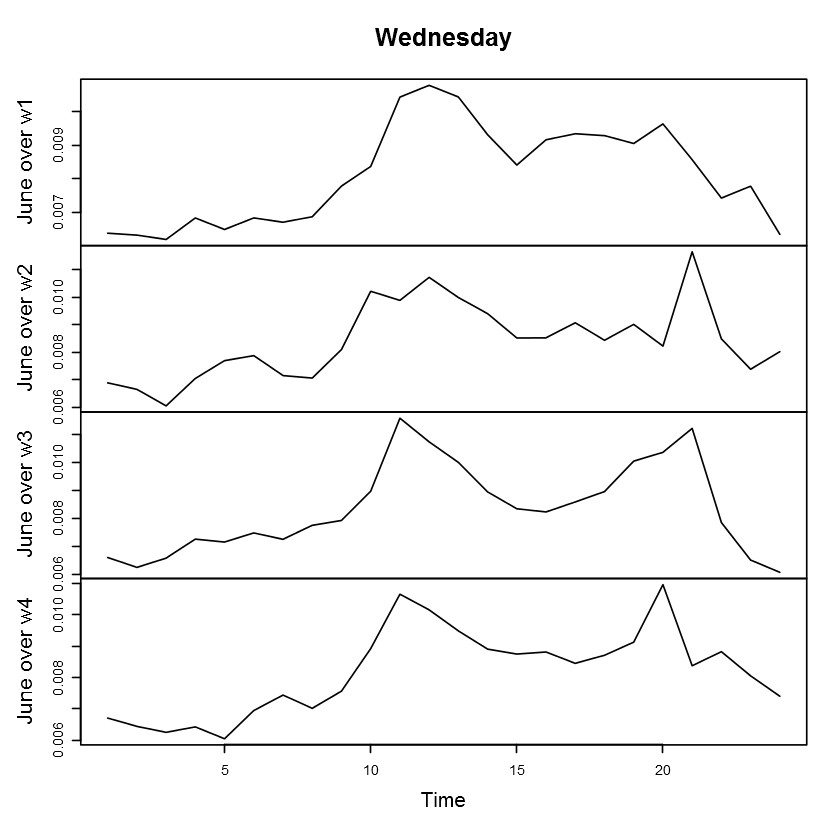

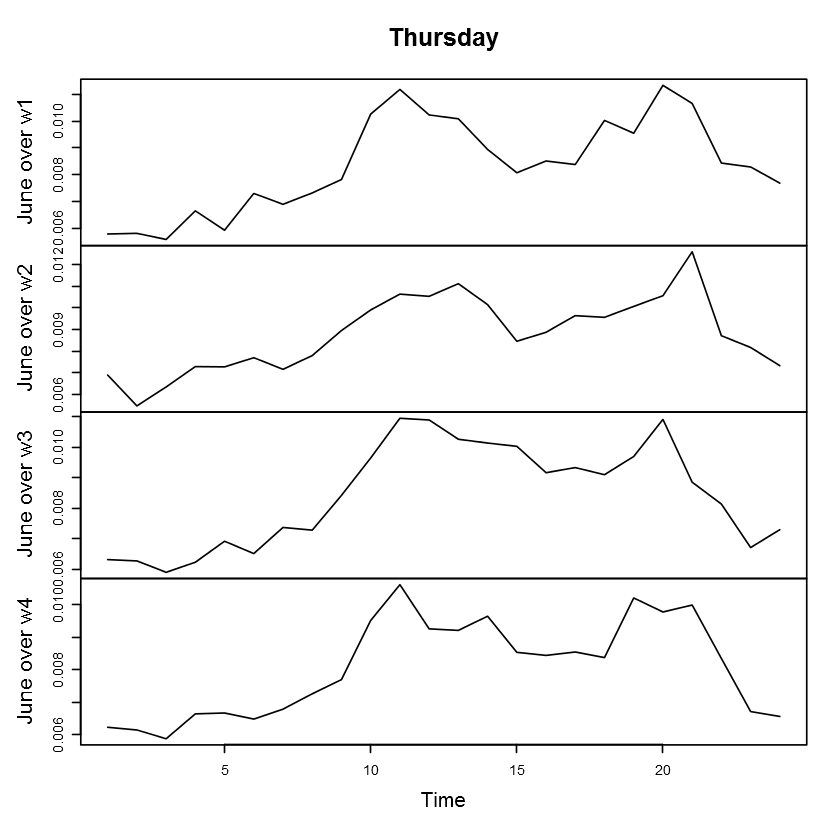

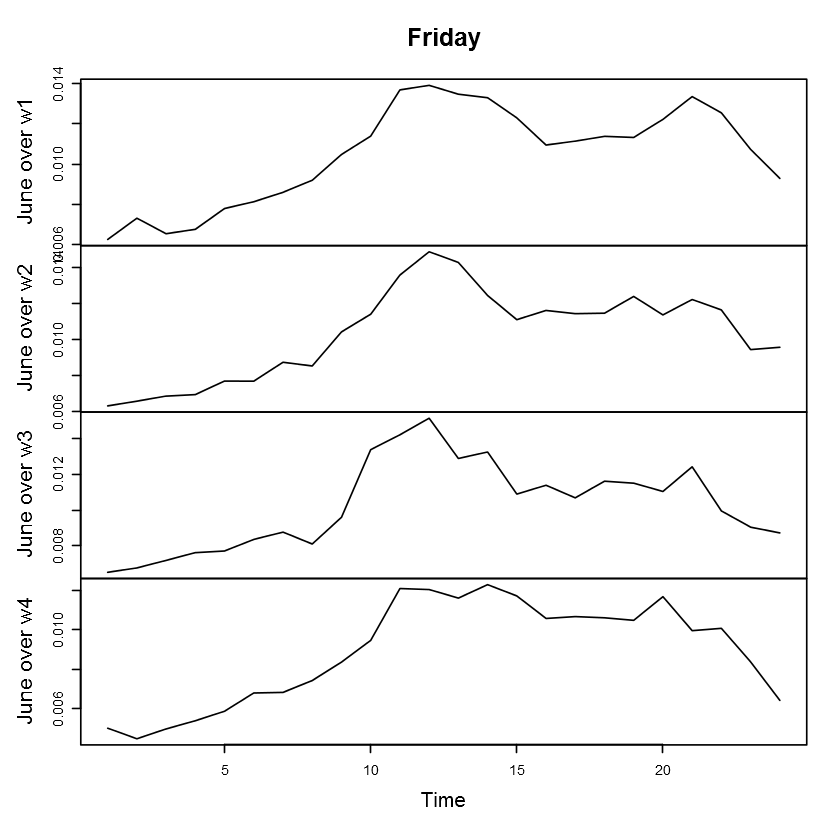

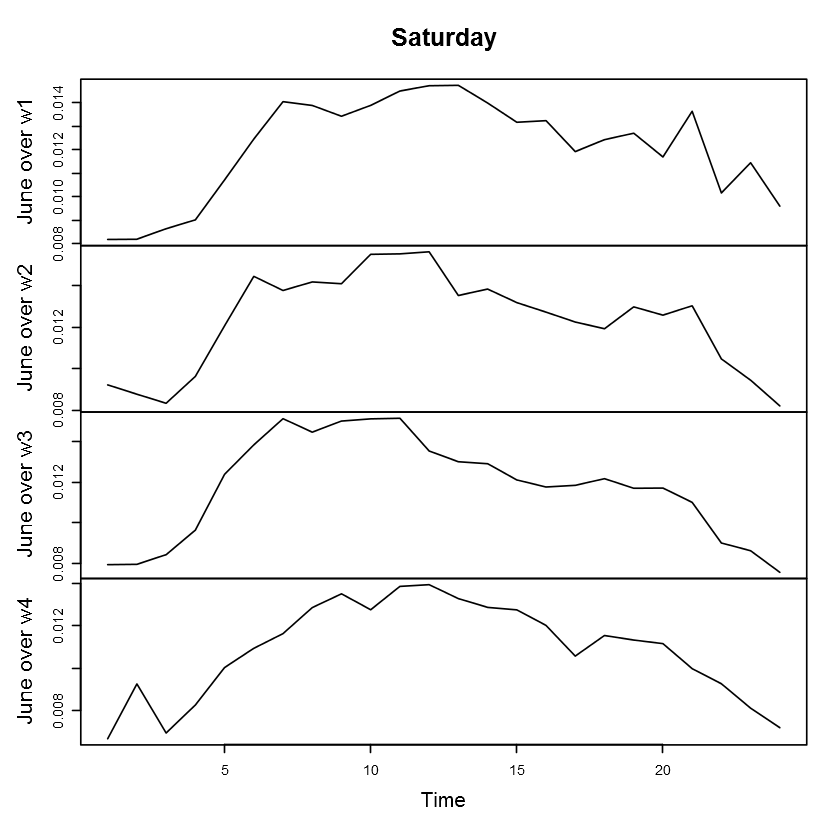

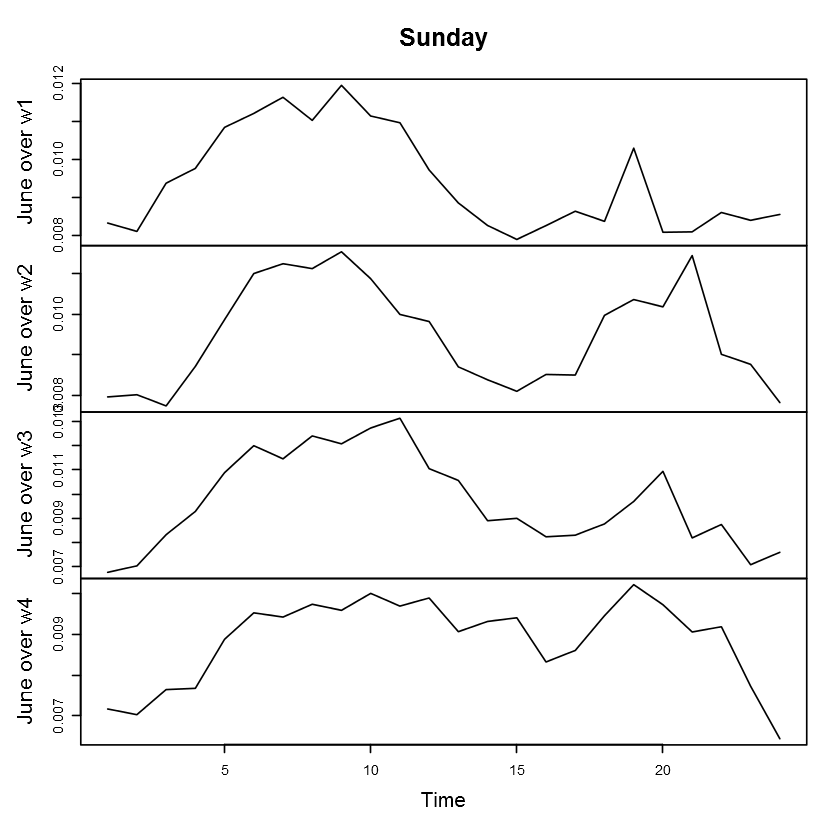

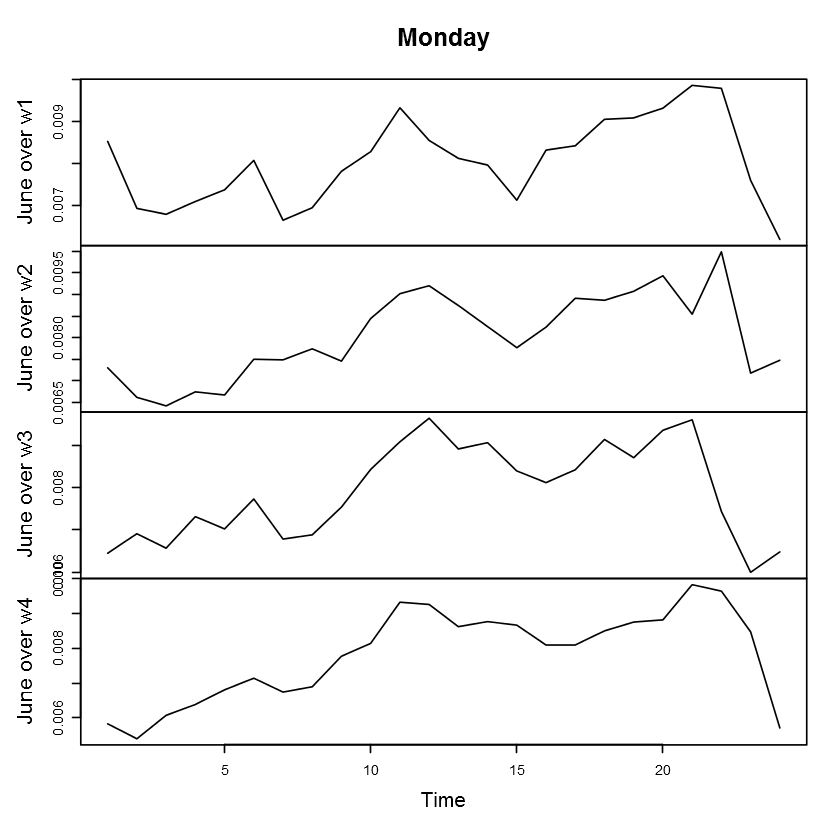

In [88]:
for (weekday in 1:7){
    over_month = data.frame(june_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4')
    plot.ts(over_month, main=weekdays[weekday])
}